# Experiment No.5 Diffusion Models
**Selected Topic :- AI Book Cover Generator** \
**Topic for Audio :- Car Engine Sound Synthesis** \
**Topic For Video :- A car driving on a winding road, cinematic**

 Implement a basic diffusion model for image generation by simulating the process of adding and removing noise. Use a pre-trained diffusion model to generate images from text prompts and compare results, highlighting model strengths, limitations, and ethical considerations.


**Name: Nabil Ansari** \
**PRN: 202302040004** \
**Colab Link:** https://colab.research.google.com/drive/11QPYiuXeyKpgl2namHsX8-83CEjccQAA?usp=sharing

## Generate an AI Book Cover

Using Stable Diffusion model to generate an image suitable for a book cover based on a descriptive text prompt.

In [ ]:
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

In [ ]:
import torch

pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating book cover image for prompt: 'A mystical forest with ancient trees and glowing creatures, fantasy book cover art, digital painting, epic scale, vibrant colors,add Random book name with similar theme'


  0%|          | 0/50 [00:00<?, ?it/s]

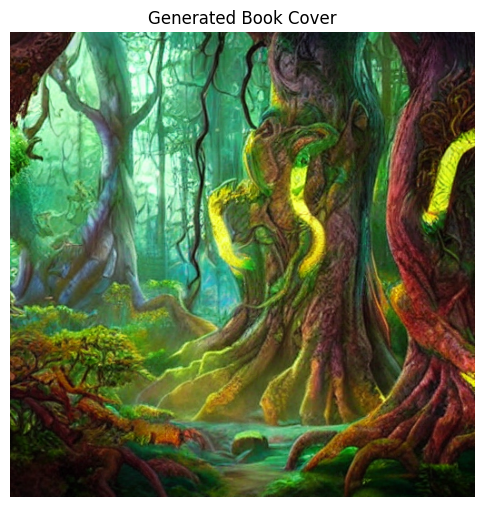

In [ ]:
import matplotlib.pyplot as plt


book_cover_prompt = "A mystical forest with ancient trees and glowing creatures, fantasy book cover art, digital painting, epic scale, vibrant colors,add Random book name with similar theme"

print(f"Generating book cover image for prompt: '{book_cover_prompt}'")

# Generate the image
book_cover_image = pipe(book_cover_prompt).images[0]

# Display the generated book cover
plt.figure(figsize=(6, 9))
plt.imshow(book_cover_image)
plt.title("Generated Book Cover", fontsize=12)
plt.axis('off')
plt.show()

## Adding Text to the Book Cover

Add a title and other text elements to the generated book cover image using an image editing library.

In [ ]:
# Download a font from Google Fonts (example: Montez)
# Use the raw file URL from GitHub
font_url = "https://raw.githubusercontent.com/google/fonts/main/apache/montez/Montez-Regular.ttf"
font_file = "Montez-Regular.ttf"

!wget -O {font_file} {font_url}

print(f"Downloaded font to: {font_file}")

--2025-11-02 07:26:09--  https://raw.githubusercontent.com/google/fonts/main/apache/montez/Montez-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77132 (75K) [application/octet-stream]
Saving to: ‘Montez-Regular.ttf’

Montez-Regular.ttf  100%[===================>]  75.32K  --.-KB/s    in 0.001s  

2025-11-02 07:26:09 (87.1 MB/s) - ‘Montez-Regular.ttf’ saved [77132/77132]

Downloaded font to: Montez-Regular.ttf


Using font: Montez-Regular.ttf


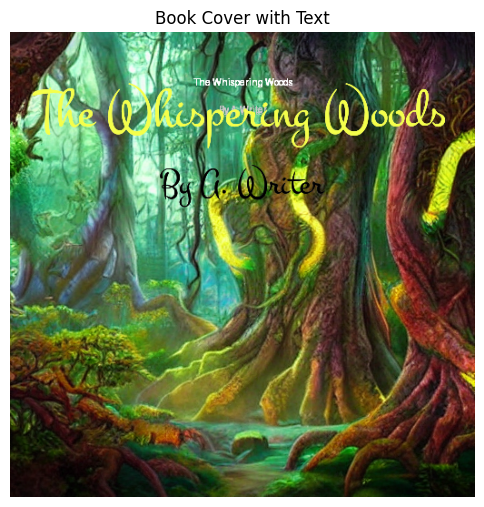

In [ ]:
from PIL import ImageDraw, ImageFont, Image
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Convert the generated image to a PIL Image if it's not already
if not isinstance(book_cover_image, Image.Image):
    book_cover_image = Image.fromarray(book_cover_image.astype('uint8'))

# Create a drawing object
draw = ImageDraw.Draw(book_cover_image)

# Define text and properties
title = "The Whispering Woods"
author = "By A. Writer"
title_color = (244, 255, 74) # White color
author_color = (0, 0, 0) # Grey color

font_file = "Montez-Regular.ttf"

try:
    title_font = ImageFont.truetype(font_file, 60)
    author_font = ImageFont.truetype(font_file, 40)
    print(f"Using font: {font_file}")
except IOError:
    print(f"Font file not found at {font_file}, using default PIL font.")
    title_font = ImageFont.load_default()
    author_font = ImageFont.load_default()


# Calculate text position (centered at the top)
image_width, image_height = book_cover_image.size
# Use textbbox for accurate text size calculation
title_bbox = draw.textbbox((0, 0), title, font=title_font)
title_width = title_bbox[2] - title_bbox[0]
title_height = title_bbox[3] - title_bbox[1]

author_bbox = draw.textbbox((0, 0), author, font=author_font)
author_width = author_bbox[2] - author_bbox[0]
author_height = author_bbox[3] - author_bbox[1]


title_position = ((image_width - title_width) / 2, 50) # 50 pixels from the top
author_position = ((image_width - author_width) / 2, title_position[1] + title_height + 20) # Below the title

# Add text to the image
draw.text(title_position, title, fill=title_color, font=title_font)
draw.text(author_position, author, fill=author_color, font=author_font)

# Display the image with text
plt.figure(figsize=(6, 9))
plt.imshow(book_cover_image)
plt.title("Book Cover with Text", fontsize=12)
plt.axis('off')
plt.show()

## Audio/Music Generation with Diffusion Models

Diffusion models can also be used for generating audio and music. Similar to image generation, the process involves learning to reverse a diffusion process that adds noise to audio signals.

In [1]:
# Install necessary libraries
%pip install transformers accelerate scipy

# Install the latest diffusers library from source
%pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-_tonp4sk
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-_tonp4sk
  Resolved https://github.com/huggingface/diffusers.git to commit 5a47442f9221eba3abe3e27c7af8304241ac58ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.36.0.dev0-py3-none-any.whl size=4419460 sha256=2ddbe50282e27040486667e61d0870e4048f707f94d5381f11a667d124d380c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-nq198ke_/wheels/23/0f/7d/f97813d265ed0e599a78d83afd4e1925740896ca79b46cccfd
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.2
    Uninstalling diffusers-0.35.2:
      Successfully uninstalled diffusers-0.35.2


In [12]:
from diffusers import AudioLDMPipeline
import torch
import numpy as np
import scipy.io.wavfile as wavfile

model_id = "cvssp/audioldm"


pipe = AudioLDMPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to("cuda")

prompt = "Car sound"

output = pipe(prompt, num_inference_steps=50, audio_length_in_s=5.0)

audio = output.audios[0]

# Normalize to a safe range
audio = audio / (np.max(np.abs(audio)) + 1e-9)

wavfile.write("output.wav", 16000, (audio * 32767).astype(np.int16))


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cvssp--audioldm/snapshots/8ed5f6437581a2fee9c662842d7cb13459914b0f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cvssp--audioldm/snapshots/8ed5f6437581a2fee9c662842d7cb13459914b0f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cvssp--audioldm/snapshots/8ed5f6437581a2fee9c662842d7cb13459914b0f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cvssp--audioldm/snapshots/8ed5f6437581a2fee9c662842d7cb13459914b0f/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The AudioLDMPipeline has been deprecated and will not receive bug fixes or feature updates after Diffusers version 0.33.1. 


  0%|          | 0/50 [00:00<?, ?it/s]

In [18]:
from IPython.display import Audio, display

display(Audio("output.wav", autoplay=True))

The generated audio file `output.wav` should now be available in the Colab environment. You can download and play it to hear the result.

## Video Generation with Diffusion Models

Diffusion models can also be extended to generate video sequences. This often involves generating a series of frames that are consistent over time.

In [13]:
# Install necessary libraries (if not already installed)
%pip install transformers accelerate scipy

# Install the latest diffusers library from source (if not already installed)
%pip install git+https://github.com/huggingface/diffusers.git
%pip install einops omegaconf pytorch-lightning

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-fnnzul4y
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-fnnzul4y
  Resolved https://github.com/huggingface/diffusers.git to commit 5a47442f9221eba3abe3e27c7af8304241ac58ca
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 72.2 MB/s eta 0:00:00


In [19]:
from diffusers import StableDiffusionPipeline, DiffusionPipeline
import torch
from huggingface_hub import login
from google.colab import userdata
import imageio

video_model_id = "cerspense/zeroscope_v2_576w"

try:
    video_pipe = DiffusionPipeline.from_pretrained(video_model_id, torch_dtype=torch.float16)
    video_pipe.enable_model_cpu_offload() # Helps with memory
    print(f"Loaded video diffusion model: {video_model_id}")
except Exception as e:
    print(f"Error loading model {video_model_id}: {e}")
    print("Please check if the model ID is correct, if authentication is required, or if you have sufficient resources.")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--cerspense--zeroscope_v2_576w/snapshots/6963642a64dbefa93663d1ecebb4ceda2d9ecb28/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The TextToVideoSDPipeline has been deprecated and will not receive bug fixes or feature updates after 

Loaded video diffusion model: cerspense/zeroscope_v2_576w


In [16]:
# Generate video from a text prompt
video_prompt = "A car driving on a winding road, cinematic"
print(f"Generating video for prompt: '{video_prompt}'")

# Generate video frames
# Note: Video generation can take a significant amount of time.
with torch.no_grad():
    video_frames = video_pipe(video_prompt, num_inference_steps=25, num_frames=24).frames[0]


if isinstance(video_frames, torch.Tensor):
    video_frames = video_frames.permute(0, 2, 3, 1).numpy() # Convert from (batch, channels, height, width) to (batch, height, width, channels) and then to numpy
elif not isinstance(video_frames, np.ndarray):
     # If it's a list of PIL Images or something else, convert to numpy arrays
     video_frames = [np.array(frame) for frame in video_frames]
     video_frames = np.array(video_frames) # Convert list of arrays to a single numpy array


# Convert to uint8 and scale to 0-255 if necessary
if video_frames.dtype != np.uint8:
    if np.max(video_frames) > 1.0: # Assuming float data is in range 0-255 or 0-1
        video_frames = video_frames.astype(np.uint8)
    else: # Assuming float data is in range 0-1
        video_frames = (video_frames * 255).astype(np.uint8)

# Save the frames as a GIF
output_gif_filename = "generated_video.gif"
try:
    imageio.mimsave(output_gif_filename, video_frames, duration=100) # duration in milliseconds
    print(f"Generated video saved to: {output_gif_filename}")
except Exception as e:
    print(f"Error saving video with imageio: {e}")
    print("Please check the format of 'video_frames' before saving.")

Generating video for prompt: 'A car driving on a winding road, cinematic'


  0%|          | 0/25 [00:00<?, ?it/s]

Generated video saved to: generated_video.gif


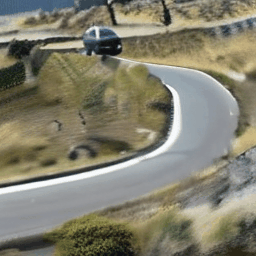

Displayed generated_video.gif


In [17]:
from IPython.display import Image, display

# Display the generated GIF
try:
    display(Image(filename="generated_video.gif"))
    print("Displayed generated_video.gif")
except FileNotFoundError:
    print("Error: generated_video.gif not found. Please ensure the video generation cell ran successfully.")
except Exception as e:
    print(f"An error occurred while trying to display the GIF: {e}")

The generated video file `generated_video.gif` should now be available in the Colab environment. You can download and view it.

## Implement a basic diffusion model


Define the forward diffusion process (adding noise) and the reverse diffusion process (removing noise).


Creating a dummy image for demonstration as 'test_image.png' was not found.


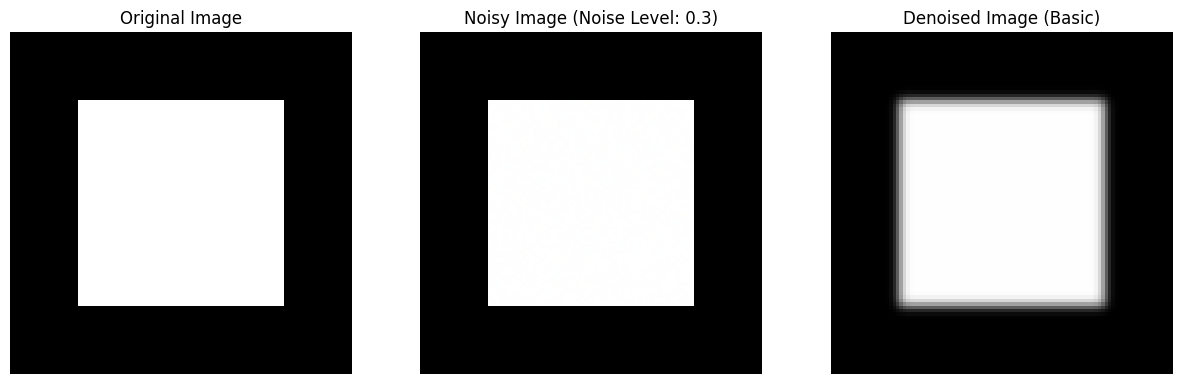

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def forward_diffusion(image, noise_level):
  """Adds noise to an image based on the noise level.

  Args:
    image: A numpy array representing the image.
    noise_level: A float between 0 and 1 representing the noise level.

  Returns:
    A numpy array representing the noisy image.
  """
  noise = np.random.normal(0, noise_level, image.shape)
  noisy_image = image + noise
  return np.clip(noisy_image, 0, 255) # Clip values to remain within image range

def reverse_diffusion(noisy_image, noise_level):
  """Attempts to remove noise from a noisy image.

  Args:
    noisy_image: A numpy array representing the noisy image.
    noise_level: A float between 0 and 1 representing the noise level.

  Returns:
    A numpy array representing the denoised image.
  """

  kernel_size = int(noise_level * 10) + 1 # Kernel size depends on noise level
  if kernel_size % 2 == 0:
    kernel_size += 1 # Ensure odd kernel size
  from scipy.ndimage import gaussian_filter
  denoised_image = gaussian_filter(noisy_image, sigma=noise_level*5)
  return np.clip(denoised_image, 0, 255) # Clip values to remain within image range

try:
    img = Image.open('test_image.png').convert('RGB')
    img_array = np.array(img)
except FileNotFoundError:
    print("Creating a dummy image for demonstration as 'test_image.png' was not found.")
    img_array = np.zeros((100, 100, 3), dtype=np.uint8)
    img_array[20:80, 20:80, :] = 255 # White square
    img = Image.fromarray(img_array)


noise_level = 0.3
noisy_img_array = forward_diffusion(img_array, noise_level)
denoised_img_array = reverse_diffusion(noisy_img_array, noise_level)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_img_array.astype(np.uint8))
plt.title(f'Noisy Image (Noise Level: {noise_level})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_img_array.astype(np.uint8))
plt.title('Denoised Image (Basic)')
plt.axis('off')

plt.show()

## Train the basic diffusion model


Generate synthetic data or use a small dataset to train the implemented diffusion model.


Generated dataset with shape: (200, 32, 32)


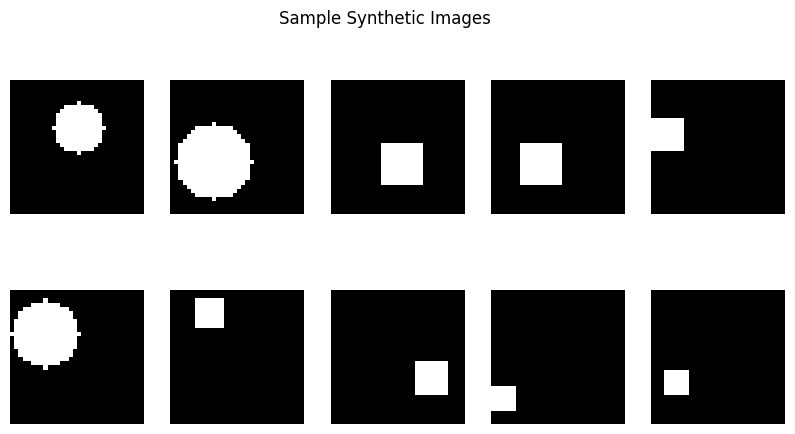

In [ ]:
import random
import math

def create_square(size, image_size=64):
  """Creates a simple square image."""
  img = np.zeros((image_size, image_size), dtype=np.float32)
  start_x = random.randint(0, image_size - size)
  start_y = random.randint(0, image_size - size)
  img[start_y:start_y + size, start_x:start_x + size] = 255
  return img

def create_circle(radius, image_size=64):
  """Creates a simple circle image."""
  img = np.zeros((image_size, image_size), dtype=np.float32)
  center_x = random.randint(radius, image_size - radius)
  center_y = random.randint(radius, image_size - radius)
  for y in range(image_size):
    for x in range(image_size):
      if (x - center_x)**2 + (y - center_y)**2 <= radius**2:
        img[y, x] = 255
  return img

def generate_synthetic_dataset(num_samples=100, image_size=64):
  """Generates a dataset of synthetic images."""
  dataset = []
  for _ in range(num_samples // 2):
    size = random.randint(5, image_size // 3)
    dataset.append(create_square(size, image_size))
    radius = random.randint(5, image_size // 3)
    dataset.append(create_circle(radius, image_size))
  random.shuffle(dataset) # Mix squares and circles
  return np.array(dataset)

synthetic_images = generate_synthetic_dataset(num_samples=200, image_size=32)

print(f"Generated dataset with shape: {synthetic_images.shape}")

# Display a few generated images
plt.figure(figsize=(10, 5))
for i in range(min(10, synthetic_images.shape[0])):
    plt.subplot(2, 5, i + 1)
    plt.imshow(synthetic_images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Synthetic Images")
plt.show()

Simulating 5 diffusion steps for one image...
  Forward step 1/5, Noise Level: 0.20
  Forward step 2/5, Noise Level: 0.40
  Forward step 3/5, Noise Level: 0.60
  Forward step 4/5, Noise Level: 0.80
  Forward step 5/5, Noise Level: 1.00
  Reverse step 1/5, Denoising from Noise Level: 1.00
  Reverse step 2/5, Denoising from Noise Level: 0.80
  Reverse step 3/5, Denoising from Noise Level: 0.60
  Reverse step 4/5, Denoising from Noise Level: 0.40
  Reverse step 5/5, Denoising from Noise Level: 0.20
Simulating 5 diffusion steps for one image...
  Forward step 1/5, Noise Level: 0.20
  Forward step 2/5, Noise Level: 0.40
  Forward step 3/5, Noise Level: 0.60
  Forward step 4/5, Noise Level: 0.80
  Forward step 5/5, Noise Level: 1.00
  Reverse step 1/5, Denoising from Noise Level: 1.00
  Reverse step 2/5, Denoising from Noise Level: 0.80
  Reverse step 3/5, Denoising from Noise Level: 0.60
  Reverse step 4/5, Denoising from Noise Level: 0.40
  Reverse step 5/5, Denoising from Noise Level: 0.2

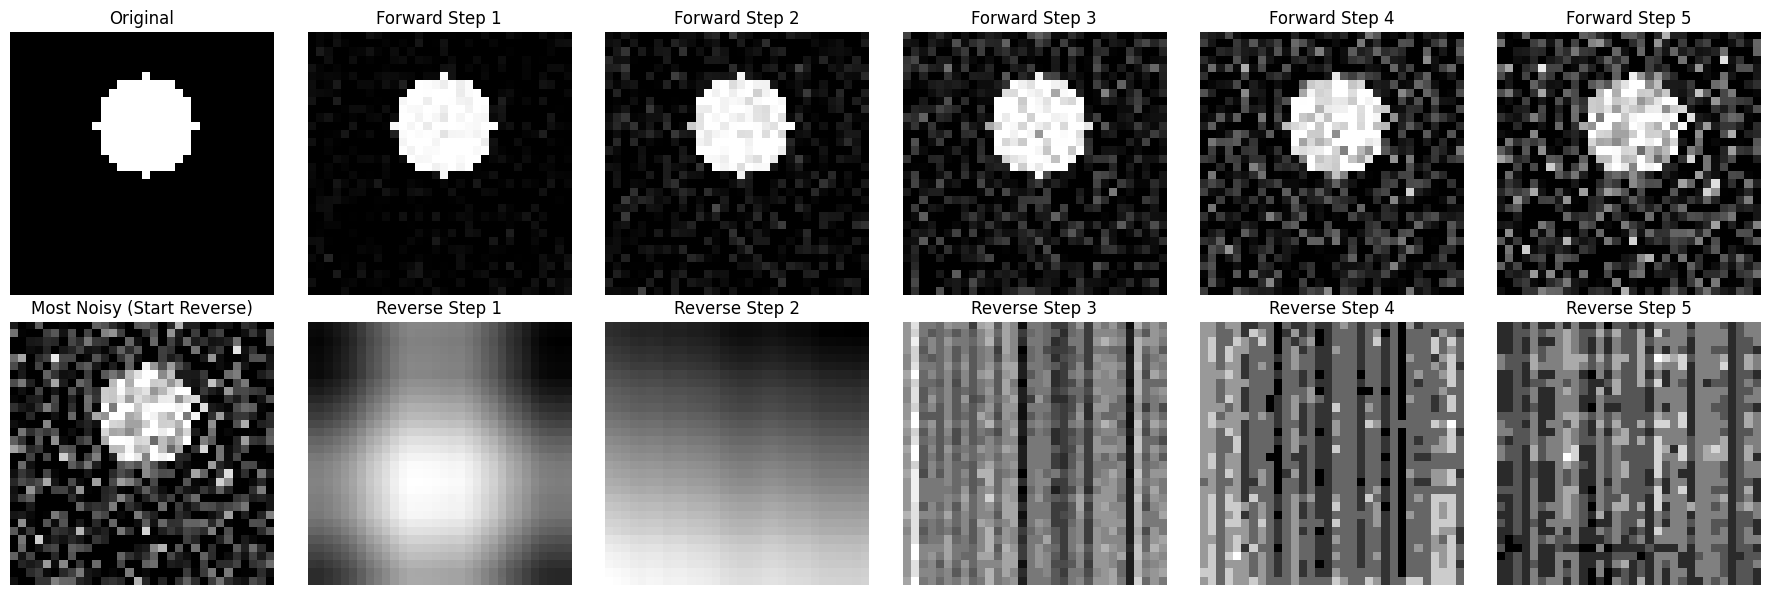

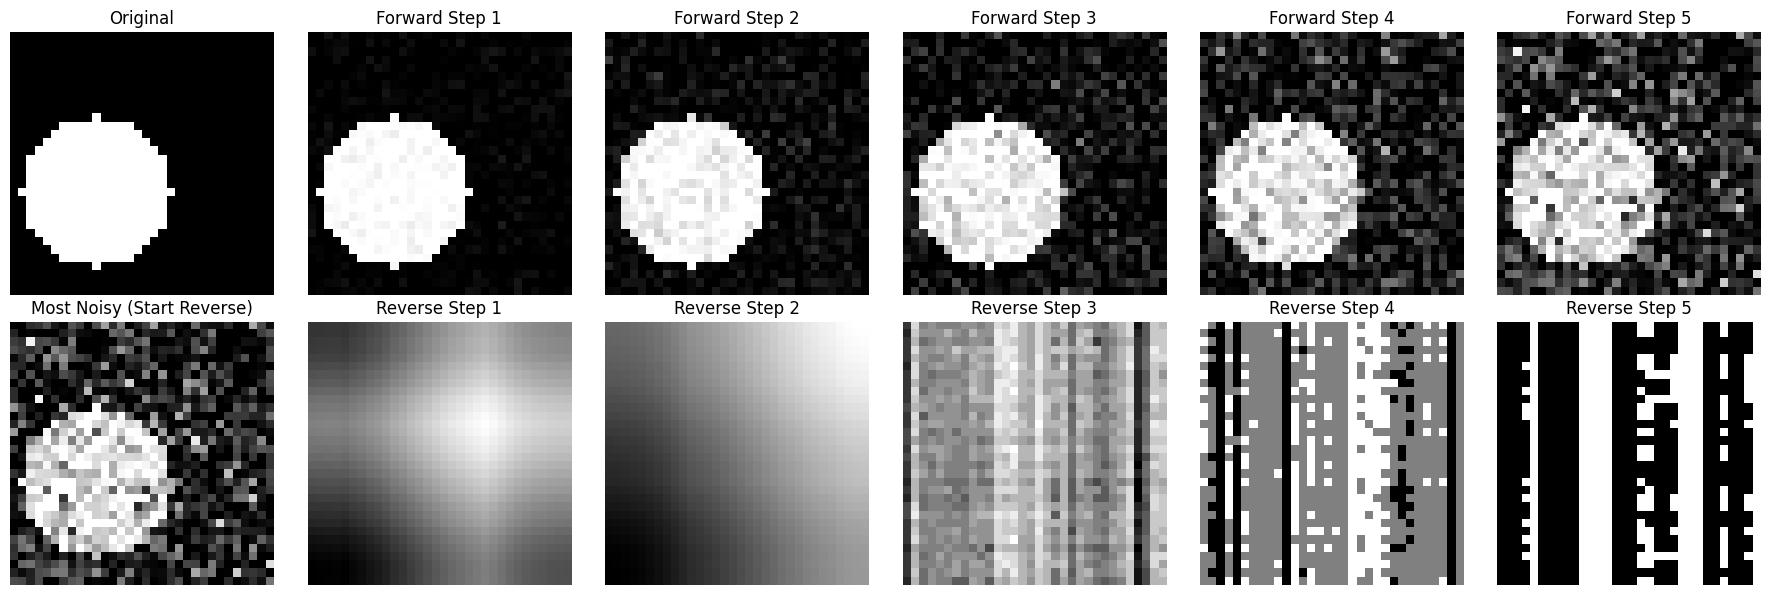

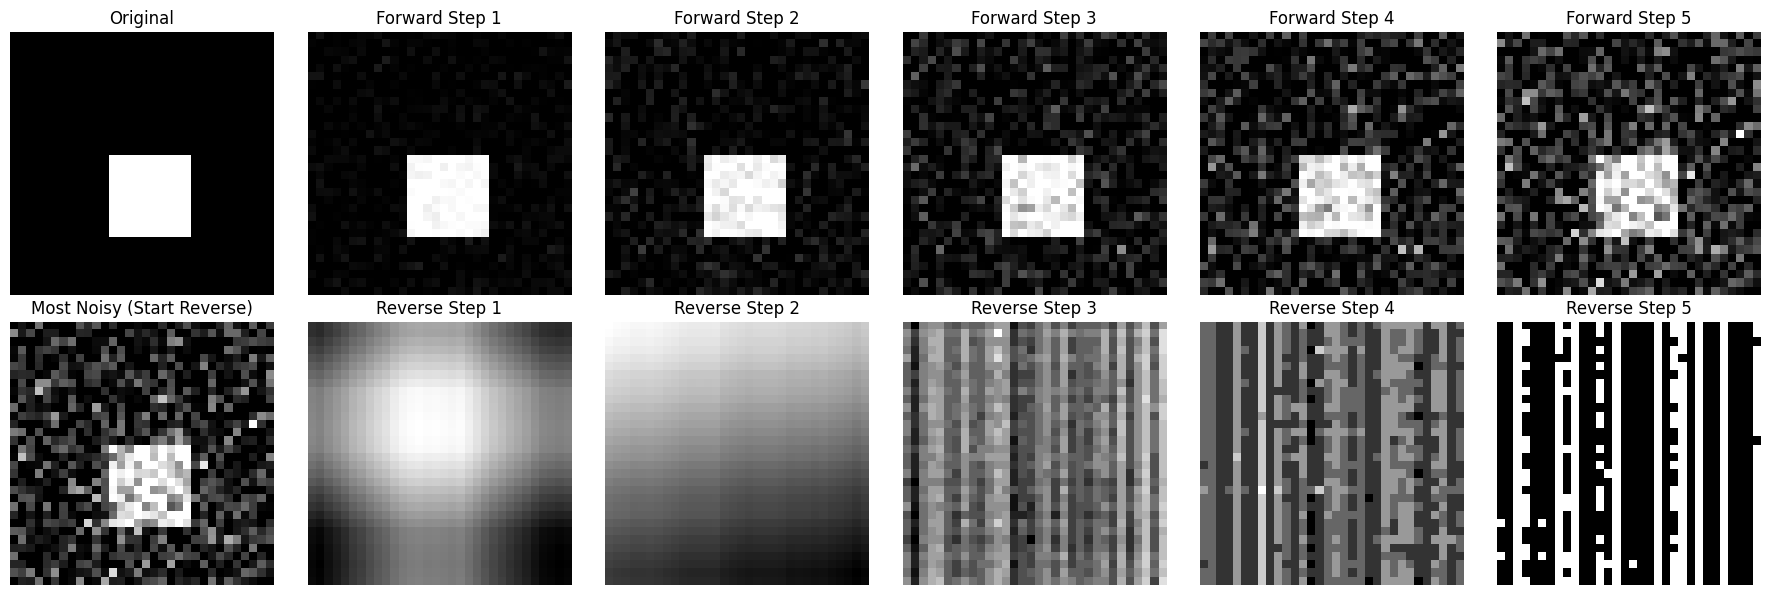

In [ ]:
def simulate_diffusion_steps(image, num_steps=5):
    """Simulates multiple forward and reverse diffusion steps."""
    original_image = image.copy()
    current_image = image.copy()
    history = [original_image]

    print(f"Simulating {num_steps} diffusion steps for one image...")

    # Simulate forward diffusion steps
    for i in range(num_steps):
        noise_level = (i + 1) / num_steps # Increase noise over steps
        current_image = forward_diffusion(current_image, noise_level * 50) # Scale noise level for visibility
        history.append(current_image.copy())
        print(f"  Forward step {i+1}/{num_steps}, Noise Level: {noise_level:.2f}")

    # Simulate reverse diffusion steps (using the basic placeholder)
    # Start from the most noisy image
    denoised_history = [history[-1]] # Start with the most noisy image
    current_denoised_image = history[-1].copy()
    for i in range(num_steps):
        # Use the noise level from the corresponding forward step for the reverse step
        noise_level = (num_steps - i) / num_steps
        # The reverse_diffusion function uses noise_level to adjust sigma,
        # so we pass the corresponding noise level from the forward pass.
        # We are essentially "reversing" the noise levels used in the forward pass.
        current_denoised_image = reverse_diffusion(current_denoised_image, noise_level * 50) # Use scaled noise level
        denoised_history.append(current_denoised_image.copy())
        print(f"  Reverse step {i+1}/{num_steps}, Denoising from Noise Level: {noise_level:.2f}")

    return original_image, history, denoised_history

# Select a few images from the synthetic dataset for simulation
sample_images = synthetic_images[:3]
all_simulation_results = []

for img in sample_images:
    original, forward_history, reverse_history = simulate_diffusion_steps(img, num_steps=5)
    all_simulation_results.append({
        'original': original,
        'forward_history': forward_history,
        'reverse_history': reverse_history
    })

# Visualize the simulation results for each sample image
for result in all_simulation_results:
    original = result['original']
    forward_history = result['forward_history']
    reverse_history = result['reverse_history']

    num_steps = len(forward_history) - 1 # Number of forward/reverse steps
    plt.figure(figsize=(num_steps * 3 + 3, 6))

    # Plot original image
    plt.subplot(2, num_steps + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot forward diffusion steps
    for i in range(num_steps):
        plt.subplot(2, num_steps + 1, i + 2)
        plt.imshow(forward_history[i + 1], cmap='gray')
        plt.title(f'Forward Step {i+1}')
        plt.axis('off')

    # Plot the most noisy image (start of reverse process)
    plt.subplot(2, num_steps + 1, num_steps + 2)
    plt.imshow(reverse_history[0], cmap='gray')
    plt.title('Most Noisy (Start Reverse)')
    plt.axis('off')

    # Plot reverse diffusion steps
    for i in range(num_steps):
        plt.subplot(2, num_steps + 1, num_steps + 3 + i)
        plt.imshow(reverse_history[i + 1], cmap='gray')
        plt.title(f'Reverse Step {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Use a pre-trained diffusion model


Load a pre-trained diffusion model (e.g., from a library like Hugging Face Transformers).


In [ ]:
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

In [ ]:
import torch

pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generate images from text prompts


Use the pre-trained model to generate images based on provided text prompts.


Generating image for prompt: 'A futuristic city with flying cars'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A serene landscape with mountains and a lake'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A portrait of a wise old owl'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'An abstract painting in vibrant colors'


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: 'A medieval castle under a starry night'


  0%|          | 0/50 [00:00<?, ?it/s]

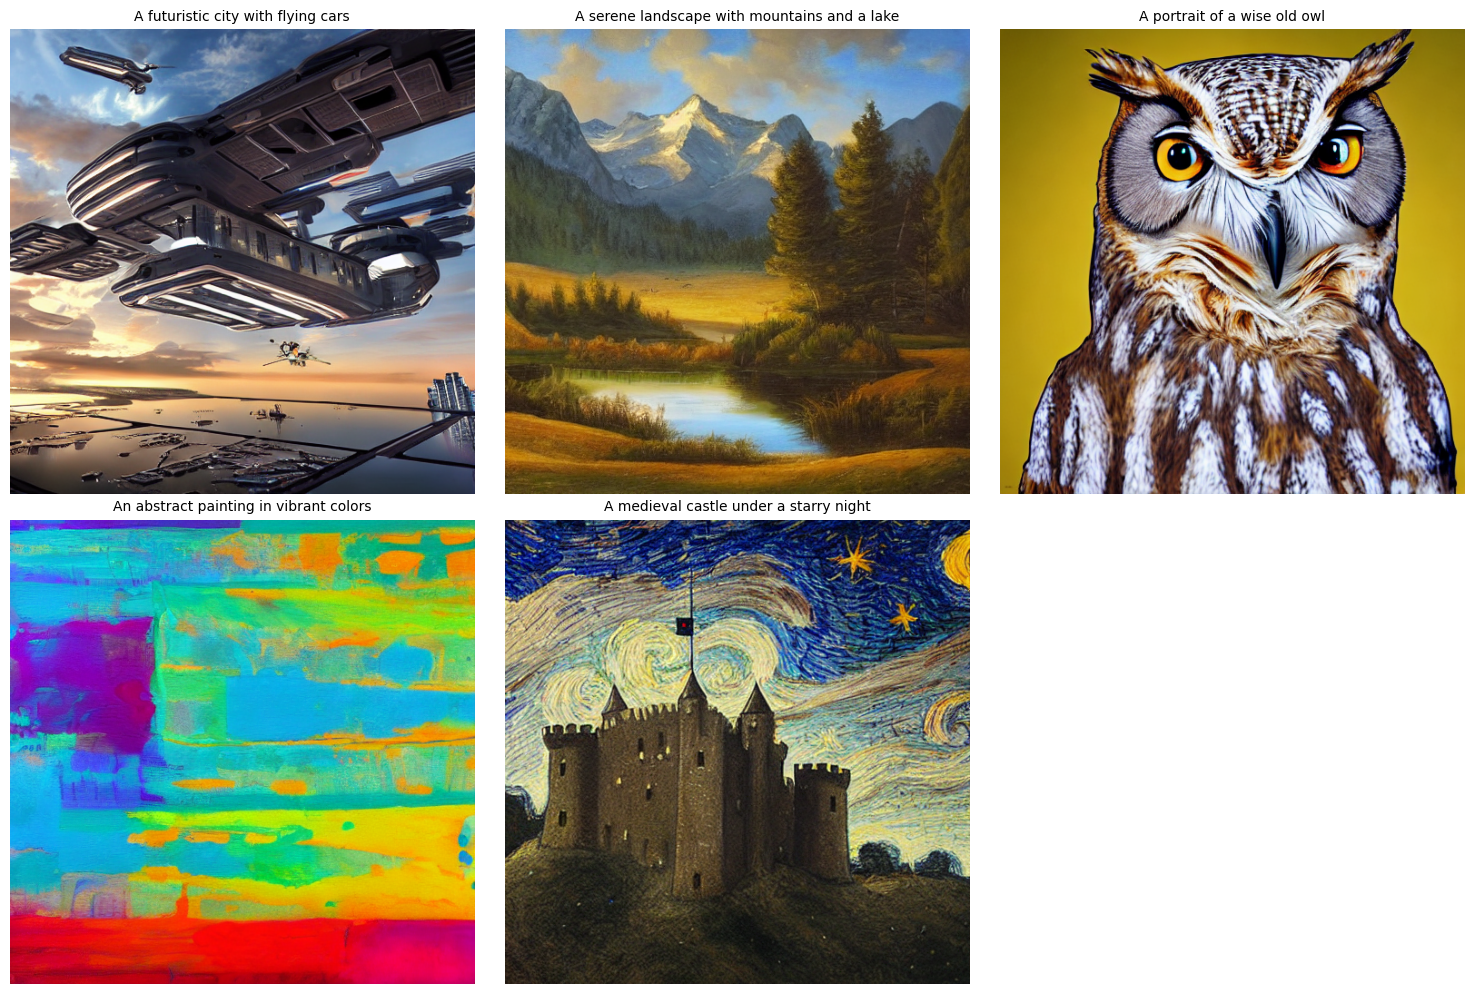

In [ ]:
prompts = [
    "A futuristic city with flying cars",
    "A serene landscape with mountains and a lake",
    "A portrait of a wise old owl",
    "An abstract painting in vibrant colors",
    "A medieval castle under a starry night"
]

generated_images = {}

for prompt in prompts:
    print(f"Generating image for prompt: '{prompt}'")
    image = pipe(prompt).images[0]
    generated_images[prompt] = image

# Display the generated images
plt.figure(figsize=(15, 10))
for i, (prompt, image) in enumerate(generated_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(prompt, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Compare results

Comparison between the basic diffusion model and the pre-trained Stable Diffusion model:
------------------------

Qualitative Comparison of Generated Images:
------------------------------------------
Simulated Basic Model Output (from 'Train the basic diffusion model' subtask):
 - The simulated reverse diffusion process (using the Gaussian filter) produced blurry, incomplete reconstructions of the simple synthetic shapes.
 - The final 'denoised' images retained significant blurring and did not fully recover the sharp edges or details of the original squares and circles.
 - This output was based on a direct reversal of the simulated noise addition using a fixed filter, not a learned denoising step.

Pre-trained Stable Diffusion Model Output (from 'Generate images from text prompts' subtask):
------------------------

 - The pre-trained model generated high-fidelity, visually appealing images.
 - The images were sharp, detailed, and successfully interpreted the diverse text prompts.
 - Examples included complex scenes like futuristic cities, landscapes, detailed portraits (owl), abstract art, and historical settings (castle).
 - The quality is vastly superior due to the model's training on a massive dataset and its complex neural network architecture for learned denoising.


Image Quality Difference:
------------------------
The difference in image quality is substantial. The basic simulation's output was merely a demonstration of noise reduction with a simple filter, resulting in poor, blurry results. The pre-trained model, in contrast, produces production-quality images with rich details and realistic (or artistically consistent, for abstract prompts) textures and forms. This highlights the power of learned denoising over simple filtering.

Diversity of Images:
-------------------
The diversity of images is also fundamentally different. The basic simulation was limited to variations of simple geometric shapes (squares and circles) from its synthetic dataset. The pre-trained model, trained on an immense and diverse dataset, can generate a virtually infinite variety of images based on creative and complex text prompts across many different styles and subjects.

Computational Cost:
------------------
The computational cost differs dramatically. The simulation of the basic model involved simple array operations (adding noise, applying a Gaussian filter) which are computationally inexpensive and can run quickly on standard CPUs.
The pre-trained Stable Diffusion model, however, requires significant computational resources. Loading the model itself consumes considerable memory, and generating images requires a powerful GPU. The inference process involves numerous forward passes through a large neural network (the UNet) for many denoising steps, making it computationally intensive and time-consuming without dedicated hardware.


Summary of Comparison:
----------------------
In summary, the pre-trained Stable Diffusion model significantly outperforms the basic simulation in image quality, diversity, and capability (generating from text). This is directly attributable to its foundation: training on vast amounts of data to learn a highly effective denoising process through a complex neural network architecture, as opposed to the basic simulation's simplified approach using a fixed filter on limited synthetic data. The basic simulation served its purpose in illustrating the *concept* of diffusion (adding and removing noise), while the pre-trained model demonstrates the *power* of a fully realized, learned diffusion system.



Ethical Considerations of Diffusion Models:
-------------------------------------------

1. Bias:
   - Diffusion models are trained on large datasets, and if these datasets reflect societal biases (e.g., in terms of race, gender, or stereotypes), the generated images can perpetuate or even amplify these biases.
   - This can lead to underrepresentation or misrepresentation of certain groups in generated content.
   - Mitigating bias requires careful dataset curation, model architecture choices, and potentially post-processing of generated images.

2. Misuse and Harmful Content Generation:
   - Diffusion models can be misused to create deepfakes, deceptive content, or images that are harmful, offensive, or violate privacy.
   - This includes generating non-consensual intimate imagery, promoting hate speech, or creating misinformation.
   - Developers and users have a responsibility to prevent such misuse. This can involve content moderation, watermarking generated images, and developing ethical guidelines for usage.

3. Intellectual Property and Copyright:
   - The training data for diffusion models often includes copyrighted images scraped from the internet.
   - There are ongoing legal and ethical debates about whether images generated by these models infringe on the copyrights of the original artists whose work was included in the training data.
   - Questions also arise about the copyright ownership of the generated images themselves.

4. Environmental Impact:
   - Training large diffusion models is computationally intensive and requires significant energy, contributing to carbon emissions.
   - While inference (generating images) is less computationally demanding than training, widespread use still has an environmental footprint.
   - Research is ongoing to develop more energy-efficient models and training methods.

5. Impact on Artists and Creative Industries:
   - The ability of diffusion models to quickly generate images from text prompts raises concerns among artists and creative professionals about the future of their livelihoods.
   - Issues include potential devaluation of artistic skills, difficulty in distinguishing AI-generated art from human-created art, and the use of artists' styles without their consent.

Addressing these ethical considerations requires a multi-faceted approach involving researchers, developers, policymakers, and users to ensure responsible and beneficial use of diffusion models.


Conclusion:
----------------
In this task, we explored the fundamental concepts of diffusion models by simulating a basic forward and reverse diffusion process. While this simulation demonstrated the principle of progressively adding and removing noise, its ability to reconstruct images with a simple filter was limited, highlighting the need for a more sophisticated learned approach.
We then utilized a powerful pre-trained diffusion model (Stable Diffusion) to generate high-quality images from various text prompts. This showcased the advanced capabilities of modern diffusion models in generating diverse and detailed imagery, a stark contrast to our basic simulation.
The comparison between the basic simulation and the pre-trained model underscored the significant differences in image quality, diversity, and computational cost, emphasizing the impact of large-scale training data and complex neural network architectures in achieving impressive generative results.
Finally, we discussed crucial ethical considerations associated with the widespread use of diffusion models, including bias in generated content, potential for misuse in creating harmful material, intellectual property concerns, environmental impact, and the implications for artists and creative industries.

Overall, this task provided insights into the working principles of diffusion models, demonstrated the power of pre-trained models for image generation, and highlighted the important ethical aspects that need to be considered as this technology continues to evolve.